In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
%%time
lust=pd.read_csv('C:\\Users\\txia\\Desktop\\NC UST\\nc_lust_status_pirf.csv',encoding="ISO-8859-1")

Wall time: 1.92 s


<string>:2: DtypeWarning: Columns (77,85,86,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.


In [7]:
lust.shape
#It has 104 columns

(31220, 104)

In [6]:
lust.dtypes

ENVID            object
EDR_TRUEDATE     object
EDR_LNKID         int64
FACID             int64
FACILID          object
EDR_FNAME        object
EDR_FADD1        object
EDR_FCITY        object
EDR_FSTAT        object
EDR_FZIP         object
EDR_ZIP         float64
EDR_FCNTY        object
USTNUM           object
MINQUAD5        float64
TESTLAT         float64
MGR              object
REGION           object
DT_OCCURED       object
RP_COMPANY       object
CONT_NAME        object
RPADD1           object
RPCITY           object
RPSTAT           object
RPZIP            object
RPCNTY           object
SOURCETYPE      float64
PROD_TYPE        object
DT_REPORT        object
COMM1            object
REGSTATUS        object
                 ...   
DT_CORRACT       object
DT_SIGNED       float64
DT_RECLASS      float64
DT_DESIGNA       object
DT_CLOSURE       object
DT_CLOSE_1       object
FACID_2         float64
DT_OCCURED_1     object
DT_REPORT_1      object
DESC1            object
ONAME           

In [79]:
pd.options.display.max_columns=None
lust.head(30).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
ENVID,S108493204,U001204575,U003853770,U001202164,S105898103,S108493207,S121425628,U003414915,S105766536,S102089263,U003755217,U003134902,S108493213,S109367482,U003147328,U001434088,S109837133,S109837124,S109504167,S109316604,S109164327,S105707469,S109164359,S109164393,S109164353,S109164358,S109164396,U001187485,S109164344,S109164362
EDR_TRUEDATE,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18,04-MAY-18
EDR_LNKID,30932,37127,30933,30941,30160,30934,30935,37018,30938,30960,30947,30942,30943,37285,37286,30792,37458,37475,37336,37238,37239,30011,37240,37241,37242,37244,37245,37247,37246,37248
FACID,30932,37127,30933,30941,30160,30934,30935,37018,30938,30960,30947,30942,30943,37285,37286,30792,37458,37475,37336,37238,37239,30011,37240,37241,37242,37244,37245,37247,37246,37248
FACILID,NaN,00-0-000,00-0-000,00-0-000,00-0-000,NaN,NaN,00-0-000,00-0-017,00-0-000,00-0-000,NaN,NaN,NaN,00-0-000,00-0-000,NaN,NaN,00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDR_FNAME,ROSEMAN & JOHNSON PROP.,TRAVELCENTER OF AMERICA - C,GTCC-JAMESTOWN,TIMES TURNAROUND - B,R-WAY-1 CURB MARKET,"JAMES PROPERTY, ERNESTINE",REIDSVILLE TEEN CENTER,FUQUAY'S TEXACO SERVICE-B,PANTRY #4133,DON MAYS GMC,PETRO EXPRESS #39,CANADA DRY-HIGH POINT-B-HYDRAULIC LIFT,"ALBRIGHT PROPERTY, LUOLA","MELTON PROPERTY, KENNETH",KEN'S QUICKIE MART #2-B,THE COUNTRY STORE,"TAYLOR RESIDENC, KAREN","MELETIOU PROPERTY, MARY","KOTIS GRAHAM, LLC","CARROLL RESIDENCE, BRENDA","RICHTER RESIDENCE, CLAYTON",HARPER HILL S.C. (MARTIN ) - 2,"BARNHARDT RESIDENCE, ET.AL.","NORRIS PROPERTY, JOAN",OLD TYRO ELEMENTARY SCHOOL,KILLORIN PROPERTY,"EASTER PROPERTY, ELLEN",BILLY'S PIZZA PUB,WOODS PRODUCE II,"ROBINSON RESIDENCE, CHARLES"
EDR_FADD1,139 ENDSLEY AVENUE,1101 NC 61,601 HIGH POINT ROAD,7915 HIGHWAY 68,5101 YANCEYVILLE RD,731 S. FIFTH STREET,506 SPRINKLE STREET,414 S. ANTHONY STREET,600 S. REGIONAL ROAD,945 N.MAIN STREET,1121 RANDOLPH ST.,2411 HIGH POINT RD.,4604 RANDLEMAN ROAD,901 GREENWOOD DR.,305 W. MAIN ST.,4807 NC HWY 57,3038 WALNUT AVE.,1422 MORNINGSIDE DR.,911 S. MAIN STREET,212 BURKEWOOD DRIVE,940 HOLLAND ST.,4911 COUNTRY CLUB,1800 BRANTLEY,2032 LYNWOOD DR.,244 TYRO SCHOOL ROAD,2523 PINEWAY DRIVE,1210 WARWICK DR.,5200 RANDLEMAN ROAD,1908 S. MAIN STREET,4515 INWOOD DR.
EDR_FCITY,WINSTON-SALEM,WHITSETT,JAMESTOWN,STOKESDALE,BROWNS SUMMIT,MEBANE,REIDSVILLE,BURLINGTON,GREENSBORO,LEXINGTON,THOMASVILLE,GREENSBORO,GREENSBORO,GREENSBORO,GIBSONVILLE,SEMORA,WINSTON-SALEM,BURLINGTON,GRAHAM,WINSTON-SALEM,WINSTON-SALEM,WINSTON-SALEM,WINSTON-SALEM,GREENSBORO,TYRO,BURLINGTON,BURLINGTON,GREENSBORO,HIGH POINT,WINSTON-SALEM
EDR_FSTAT,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC
EDR_FZIP,27106,27377,27282,27357,27214,27302,27320,27215,27409,27293,27360,NaN,27406,27410,27249,27343,27106,27217,27253,27104,27101,27104,27103,27406,NaN,27215,27215,27406,27260,27106


In [15]:
pd.options.display.max_columns=None
pd.options.display.float_format = '{:.0f}'.format
lust.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EDR_LNKID,31220,23529,11671,213,13380,23006,32648,46300
FACID,31220,23529,11671,213,13380,23006,32648,46300
EDR_ZIP,0,nan,nan,nan,nan,nan,nan,nan
MINQUAD5,0,nan,nan,nan,nan,nan,nan,nan
TESTLAT,0,nan,nan,nan,nan,nan,nan,nan
SOURCETYPE,31050,3,1,3,3,3,3,14
PHASEREQRD,8842,1,0,1,1,1,1,2
SUPPLYWELL,28929,0,0,0,0,0,0,11
MTBE,24885,0,0,0,0,0,0,11
FLAG,31220,0,0,0,0,0,0,1


In [11]:
#percentage populated
lust.count()*100/len(lust)

ENVID          100
EDR_TRUEDATE   100
EDR_LNKID      100
FACID          100
FACILID         44
EDR_FNAME      100
EDR_FADD1      100
EDR_FCITY      100
EDR_FSTAT      100
EDR_FZIP        95
EDR_ZIP          0
EDR_FCNTY      100
USTNUM         100
MINQUAD5         0
TESTLAT          0
MGR             99
REGION         100
DT_OCCURED      94
RP_COMPANY      70
CONT_NAME       83
RPADD1          89
RPCITY          89
RPSTAT          94
RPZIP           88
RPCNTY          15
SOURCETYPE      99
PROD_TYPE       99
DT_REPORT      100
COMM1           99
REGSTATUS      100
DT_NORRISS      21
DT_NOVISS        8
PHASEREQRD      28
SITE_PRIOR      33
RISK            85
CONFRISK        99
INTERCONS       10
LANDUSE         56
TYPECAP          9
RBCA            49
CLOSREQSD       10
DT_CLOSE        77
CM_TYPE         98
SUPPLYWELL      93
MTBE            80
COMMENTS        71
TELEPHONE       52
FLAG           100
ERRORFLAG       98
MTBE1          100
FLAG1           98
RELSDETCD       98
DT_LURFILED 

In [12]:
#number of unique values
lust.nunique()

ENVID           29266
EDR_TRUEDATE        1
EDR_LNKID       31220
FACID           31220
FACILID           347
EDR_FNAME       30399
EDR_FADD1       29077
EDR_FCITY        1159
EDR_FSTAT           1
EDR_FZIP         3432
EDR_ZIP             0
EDR_FCNTY         101
USTNUM          31220
MINQUAD5            0
TESTLAT             0
MGR               243
REGION              8
DT_OCCURED       8458
RP_COMPANY      14221
CONT_NAME       19344
RPADD1          20615
RPCITY           2477
RPSTAT             70
RPZIP            4172
RPCNTY            342
SOURCETYPE          3
PROD_TYPE           3
DT_REPORT        8185
COMM1               5
REGSTATUS           5
DT_NORRISS       2374
DT_NOVISS        1509
PHASEREQRD          2
SITE_PRIOR        911
RISK                5
CONFRISK            4
INTERCONS          98
LANDUSE             3
TYPECAP           186
RBCA                3
CLOSREQSD        1267
DT_CLOSE         6624
CM_TYPE             4
SUPPLYWELL         12
MTBE               10
COMMENTS  

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

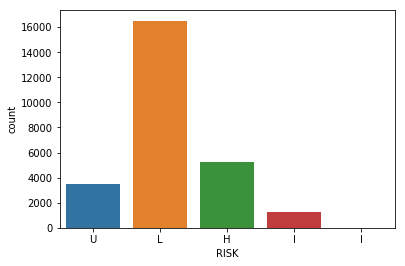

In [17]:
#RISK
sns.countplot(x='RISK',data=lust)
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

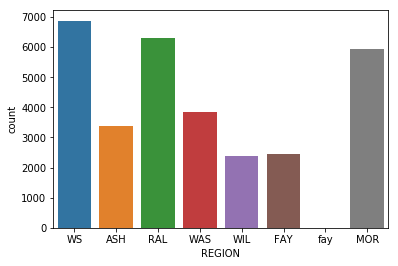

In [18]:
#REGION
sns.countplot(x='REGION',data=lust)
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

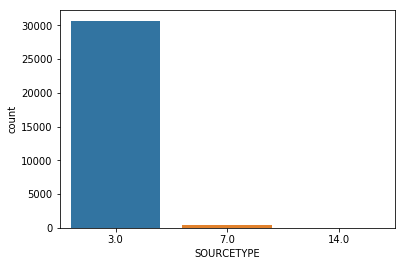

In [19]:
#SOURCETYPE
sns.countplot(x='SOURCETYPE',data=lust)
plt.xticks(rotation=0)
#may need to join another table to look up the sources

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

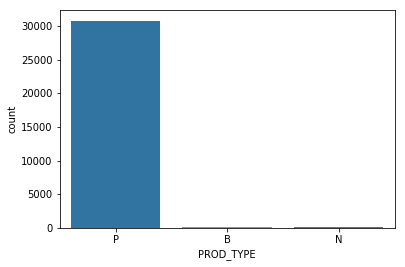

In [20]:
#PROD_TYPE
sns.countplot(x='PROD_TYPE',data=lust)
plt.xticks(rotation=0)
#may need to join

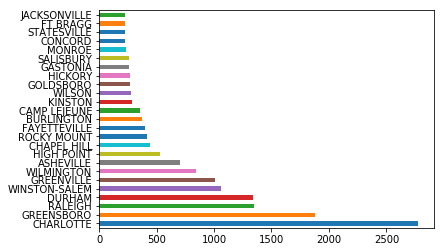

In [21]:
#EDR_FCITY
lust['EDR_FCITY'].value_counts().head(25).plot(kind='barh')

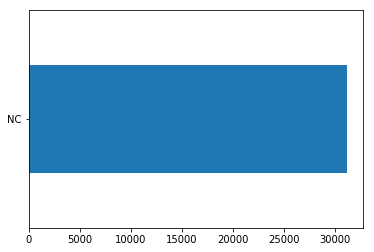

In [43]:
#EDR_FSTAT
lust['EDR_FSTAT'].value_counts().head(25).plot(kind='barh')

In [41]:
#DT_REPORT
lust['DT_REPORT']=pd.to_datetime(lust['DT_REPORT'])

In [26]:
print(lust['DT_REPORT'].min(),lust['DT_REPORT'].max())
#dates from 1975-01-28 to 2018-05-02

1975-01-28 00:00:00 2018-05-02 00:00:00


In [39]:
#DT_OCCURED
lust['DT_OCCURED']=pd.to_datetime(lust['DT_OCCURED'], errors='coerce')

In [40]:
print(lust['DT_OCCURED'].min(),lust['DT_OCCURED'].max())
#dates from 1884-05-15 to 2018-04-30

1884-05-15 00:00:00 2018-04-30 00:00:00


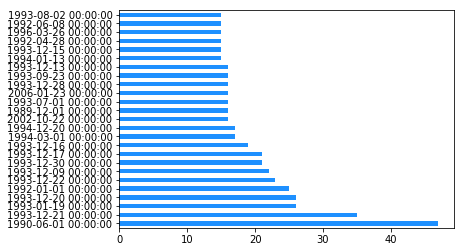

In [74]:
lust['DT_OCCURED'].value_counts().head(25).plot(kind='barh',color='#1E90FF')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

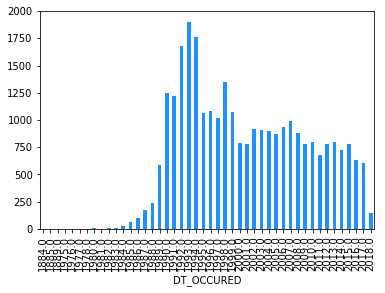

In [81]:
lust.groupby(lust['DT_OCCURED'].dt.year)['DT_OCCURED'].count().plot(kind="bar",color='#1E90FF')
plt.xticks(rotation=90)

In [89]:
lust.groupby([lust['DT_OCCURED'].dt.year.rename('year'),lust['DT_OCCURED'].dt.month.rename('month')]).size().unstack()

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
year,,,,,,,,,,,,
1884,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan
1885,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan
1889,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1
1975,1,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan
1976,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,nan
1977,nan,nan,nan,nan,nan,1,nan,nan,nan,1,nan,nan
1978,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan
1980,1,nan,1,nan,nan,nan,1,nan,nan,nan,nan,1
1981,nan,nan,nan,nan,nan,1,1,nan,nan,nan,1,nan


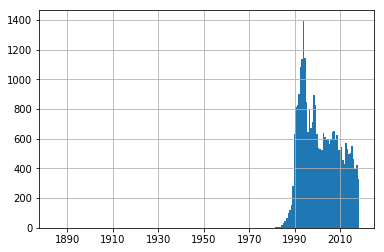

In [117]:
lust['DT_OCCURED'].hist(bins=200)

([<matplotlib.axis.XTick at 0x19a84b10400>,
 <a list of 19 Text xticklabel objects>)

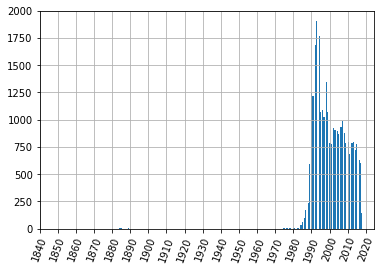

In [116]:
lust['DT_OCCURED'].dt.year.rename('year').hist(bins=200)
plt.xticks(np.arange(1840,2021,10),rotation=70)

(1970, 1999)

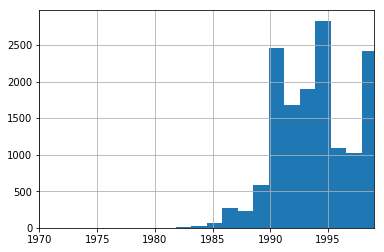

In [112]:
lust['DT_OCCURED'].dt.year.rename('year').hist(bins=100)
plt.xlim(1970,1999)

In [86]:
lust['DT_OCCURED'].describe()

count                   29297
unique                   8455
top       1990-06-01 00:00:00
freq                       47
first     1884-05-15 00:00:00
last      2018-04-30 00:00:00
Name: DT_OCCURED, dtype: object

In [87]:
#counting missing values in dates
lust['DT_OCCURED'].isnull().sum()

1923

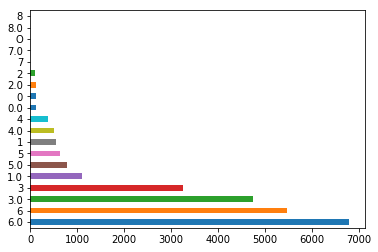

In [42]:
#OPTYPE
lust['OPTYPE'].value_counts().head(25).plot(kind='barh')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

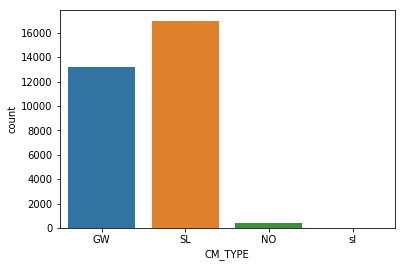

In [44]:
#CM_TYPE
sns.countplot(x='CM_TYPE',data=lust)
plt.xticks(rotation=0)

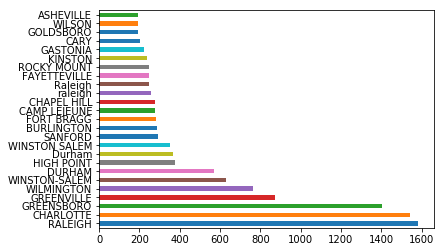

In [45]:
#RPCITY
lust['RPCITY'].value_counts().head(25).plot(kind='barh')

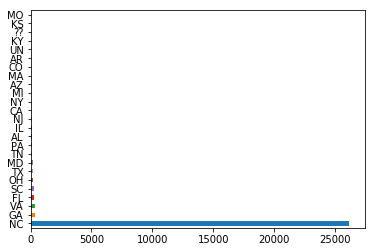

In [46]:
#RPSTAT
lust['RPSTAT'].value_counts().head(25).plot(kind='barh')

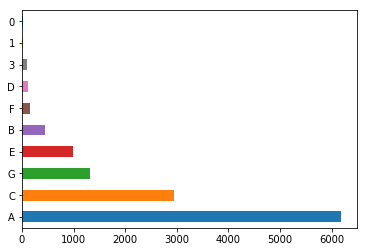

In [47]:
#RSOURCE
lust['RSOURCE'].value_counts().head(25).plot(kind='barh')

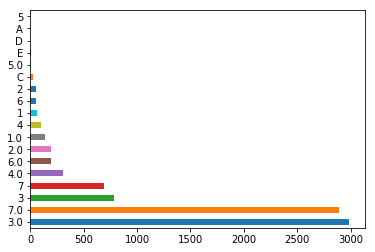

In [48]:
#RCAUSE
lust['RCAUSE'].value_counts().head(25).plot(kind='barh')

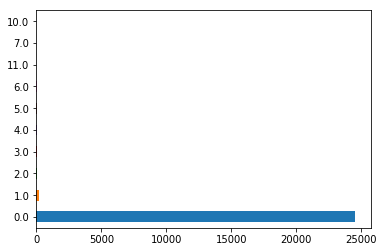

In [80]:
#MTBE
lust['MTBE'].value_counts().head(25).plot(kind='barh')

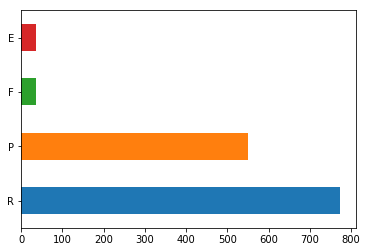

In [82]:
#ERRTYPE
lust['ERRTYPE'].value_counts().head(25).plot(kind='barh')

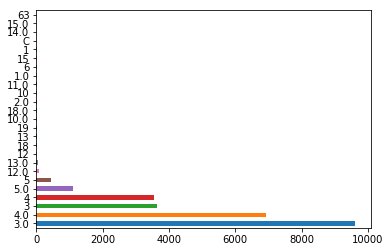

In [83]:
#FTYPE
lust['FTYPE'].value_counts().head(25).plot(kind='barh')

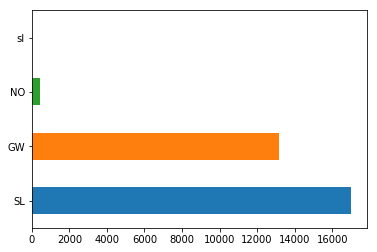

In [84]:
#CM_TYPE
lust['CM_TYPE'].value_counts().head(25).plot(kind='barh')

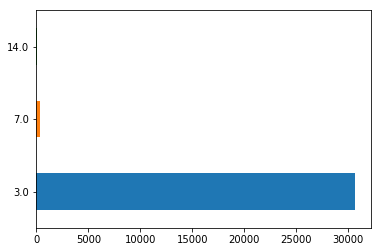

In [85]:
#SOURCETYPE
lust['SOURCETYPE'].value_counts().head(25).plot(kind='barh')